<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Project Planning</strong></h1>

When starting any project, I like to outline the steps that I plan to take. Below is the rough outline that I created for this project using commented cells.

#### Understand nature of the data .info() .describe()
#### Histograms and boxplots 
#### Value counts 
#### Missing data 
#### Correlation between the metrics 
#### Explore interesting themes  
#### Feature engineering 
#### preprocess data together or use a transformer? 
    # use label for train and test   
#### Scaling?

#### Model Baseline 
#### Model comparison with CV
#### Hypothesis forming

<hr>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>

### 1. [OVERVIEW AND IMPORTING DATA](#1)

1.1 [Overview](#1.1)

1.2 [Required  Libraries](#1.2)

<br>

### 2. [Data Preparation & Data exploration (EDA)](#2)

2.1 [Number of Accidents per State](#2.1)

2.2 [Most frequent words in the description](#2.2)

2.3 [Most frequent road features](#2.3)

2.4 [Medium distance by severity](#2.4)

2.5 [Weather condition histogram](#2.5)

2.6 [Number of accidents for weekday](#2.6)

<!-- 
2.1 [Number of Accidents per State](#2.1)

2.2 [Most frequent words in the description](#2.2)

2.3 [Most frequent road features](#2.3)

2.4 [Medium distance by severity](#2.4)

2.5 [Weather condition histogram](#2.5)

2.6 [Number of accidents for weekday](#2.6) -->


<br>

### 3. [Feature engineering](#3)
    

3.1 [Feature addition](#3.1)

3.2 [Check correlation between features](#3.2)

3.3 [Feature selection](#3.3)

3.4 [Drop duplicates](#3.4)

3.5 [Handle erroneous and missing values](#3.5)

3.6 [Check features variance](#3.6)

3.7 [Handle unbalanced data](#3.7)

3.8 [Feature scaling](#3.8)

3.9 [Feature encoding](#3.9)

<br>

### 4. [Model training](#4)

4.1 [Logistic regression](#4.1)

4.2 [Decision Tree](#4.2)

4.3 [Random Forest](#4.3)

<br>

### 5. [Model evaluation and export](#5)

<br>

### 6. [References](#6)



<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Overview Dataset</strong></h1>

<a id="1.1"></a>
# 1.1 Overview

[Dataset Details](https://smoosavi.org/datasets/us_accidents)


**Traffic Attributes (12)**:

* **ID**: This is a unique identifier of the accident record.

* **Severity**: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

* **Start_Time**: Shows start time of the accident in local time zone.

* **End_Time**: Shows end time of the accident in local time zone.

* **Start_Lat**: Shows latitude in GPS coordinate of the start point.

* **Start_Lng**: Shows longitude in GPS coordinate of the start point.

* **End_Lat**: Shows latitude in GPS coordinate of the end point.

* **End_Lng**: Shows longitude in GPS coordinate of the end point.

* **Distance(mi)**: The length of the road extent affected by the accident.


**Address Attributes (9)**:

* **Number**: Shows the street number in address field.

* **Street**: Shows the street name in address field.

* **Side**: Shows the relative side of the street (Right/Left) in address field.

* **City**: Shows the city in address field.

* **County**: Shows the county in address field.

* **State**: Shows the state in address field.

* **Zipcode**: Shows the zipcode in address field.

* **Country**: Shows the country in address field.

* **Timezone**: Shows timezone based on the location of the accident (eastern, central, etc.).

**Weather Attributes (11)**:

* **Airport_Code**: Denotes an airport-based weather station which is the closest one to location of the accident.

* **Weather_Timestamp**: Shows the time-stamp of weather observation record (in local time).

* **Temperature(F)**: Shows the temperature (in Fahrenheit).

* **Wind_Chill(F)**: Shows the wind chill (in Fahrenheit).

* **Humidity(%)**: Shows the humidity (in percentage).

* **Pressure(in)**: Shows the air pressure (in inches).

* **Visibility(mi)**: Shows visibility (in miles).

* **Wind_Direction**: Shows wind direction.

* **Wind_Speed(mph)**: Shows wind speed (in miles per hour).

* **Precipitation(in)**: Shows precipitation amount in inches, if there is any.

* **Weather_Condition**: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

**POI Attributes (13)**:

* **Amenity**: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

* **Bump**: A POI annotation which indicates presence of speed bump or hump in a nearby location.

* **Crossing**: A POI annotation which indicates presence of crossing in a nearby location.

* **Give_Way**: A POI annotation which indicates presence of give_way sign in a nearby location.

* **Junction**: A POI annotation which indicates presence of junction in a nearby location.

* **No_Exit**: A POI annotation which indicates presence of no_exit sign in a nearby location.

* **Railway**: A POI annotation which indicates presence of railway in a nearby location.

* **Roundabout**: A POI annotation which indicates presence of roundabout in a nearby location.

* **Station**: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

* **Stop**: A POI annotation which indicates presence of stop sign in a nearby location.

* **Traffic_Calming**: A POI annotation which indicates presence of traffic_calming means in a nearby location.

* **Traffic_Signal**: A POI annotation which indicates presence of traffic_signal in a nearby location.

* **Turning_Loop**: A POI annotation which indicates presence of turning_loop in a nearby location.

**Period-of-Day (4)**:

* **Sunrise_Sunset**: Shows the period of day (i.e. day or night) based on sunrise/sunset.

* **Civil_Twilight**: Shows the period of day (i.e. day or night) based on civil twilight.

* **Nautical_Twilight**: Shows the period of day (i.e. day or night) based on nautical twilight.

* **Astronomical_Twilight**: Shows the period of day (i.e. day or night) based on astronomical twilight.

<a id="1.2"></a>
# 1.2 Required  Libraries

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} missingno

# work with data in tabular representation
from datetime import time

import pandas as pd
# round the data in the correlation matrix
import numpy as np
# module for regular expression
import re

# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# run a python file 
%run function.py

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Eror Messages
import warnings

warnings.filterwarnings('ignore')

Solving environment: done

## Package Plan ##

  environment location: /Users/taa/opt/anaconda3

  added / updated specs:
    - missingno


The following NEW packages will be INSTALLED:

  missingno          pkgs/main/noarch::missingno-0.4.2-pyhd3eb1b0_1

The following packages will be UPDATED:

  conda                               4.10.1-py38hecd8cb5_1 --> 4.11.0-py38hecd8cb5_0


Preparing transaction: done
Verifying transaction: failed

EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: /Users/taa/opt/anaconda3
  uid: 1163210130
  gid: 721532113




In [2]:
# check version of Numpy (to create a requirements.txt)
np.__version__

'1.20.1'

In [3]:
# check version of Pandas (to create a requirements.txt)
pd.__version__

'1.2.4'

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Data Preparation & Data exploration (EDA)</strong></h1>

<a id="2.1"></a>
# 2.1 Data Preparation

Perform all necessary data cleaning and preparation for train, test, validation

[Detail of the dataset](https://smoosavi.org/datasets/us_accidents)

#### Original Memory usage of each dataset
+ TRAIN: memory usage: 120.1+ MB
+ TEST: memory usage: 40.0+ MB
+ VALIDATION: memory usage: 40.0+ MB

#### Understand the problem
+ Data Type: Tabular data
+ Problem Type:  Regression
+ Evaludation Metric: RMSE, MSE, MAE, R2

#### I drop `ResponseId` to avoid leakage of the data. 
The unique identifier of the accident record is not relevant for this problem. So I will omit it from all DataFrames and call the `info()` method to **check their high level information**

In [4]:
from function import style
%time

# TRAIN
# read and drop drop ID column-wise
# train = pd.read_csv('cosc2789-2021/train.csv', parse_dates=['End_Time', 'Start_Time', 'Weather_Timestamp']).drop("ID", axis=1)
train = pd.read_csv('cosc2789-2021/train.csv').drop("ID", axis=1)
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(f'The TRAIN Dataframe contain {train.shape[0]} records and {train.shape[1]} columns.\n\n')  # 454819 rows and 45 columns
# lets make end time as index
train = train.sort_values(by=['End_Time'])
# use the .info() method, which will print out a concise summary of the DataFrame:
print(train.info())
print('--------------------------------------------------------------------------')
# print out first 3 lines of the dataframe
# style(train.head(3))


# VALIDATION
# read and drop drop ID column-wise
validation = pd.read_csv('cosc2789-2021/val.csv').drop("ID", axis=1)
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(f'The VALIDATION Dataframe contain {validation.shape[0]} records and {validation.shape[1]} columns.\n\n')  # 151606 rows and 45 columns
# lets make end time as index
validation = validation.sort_values(by=['End_Time'])
# use the .info() method, which will print out a concise summary of the DataFrame:
print(validation.info())
print('--------------------------------------------------------------------------')
# print out first 3 lines of the dataframe
# style(validation.head(3))


# TRAIN
# read and drop drop ID column-wise
test = pd.read_csv('cosc2789-2021/test.csv').drop("ID", axis=1)
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(f'The TEST Dataframe contain {test.shape[0]} records and {test.shape[1]} columns.\n\n')  # 151607 rows and 44 columns
# lets make end time as index
# use the .info() method, which will print out a concise summary of the DataFrame:
print(test.info())
print('--------------------------------------------------------------------------')
# print out first 3 lines of the dataframe
style(test.head(3))

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 2.86 µs
The TRAIN Dataframe contain 454819 records and 45 columns.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 454819 entries, 377127 to 391941
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               454819 non-null  int64  
 1   Start_Time             454819 non-null  object 
 2   End_Time               454819 non-null  object 
 3   Start_Lat              454819 non-null  float64
 4   Start_Lng              454819 non-null  float64
 5   End_Lat                454819 non-null  float64
 6   End_Lng                454819 non-null  float64
 7   Distance(mi)           454819 non-null  float64
 8   Number                 140896 non-null  float64
 9   Street                 454819 non-null  object 
 10  Side                   454819 non-null  object 
 11  City                   454796 non-null  object 
 12  Coun

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2020-12-15 18:06:30,2020-12-16 03:35:30,33.708096,-117.780277,33.733073,-117.814465,2.615000,nan,I-5 N,R,Irvine,Orange,CA,92620,US,US/Pacific,KSNA,2020-12-15 17:53:00,63.000000,63.000000,40.000000,30.110000,10.000000,CALM,0.000000,0.000000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
1,2019-09-25 17:57:00,2019-09-25 19:18:45,37.660428,-122.403812,37.660428,-122.403812,0.000000,nan,Bayshore Fwy N,R,South San Francisco,San Mateo,CA,94080,US,US/Pacific,KSFO,2019-09-25 17:56:00,87.000000,87.000000,29.000000,29.700000,10.000000,W,18.000000,0.000000,Partly Cloudy,False,False,False,False,False,False,False,False,True,False,False,False,False,Day,Day,Day,Day
2,2020-11-06 18:57:10,2020-11-06 21:32:23,45.647664,-111.351367,45.648531,-111.351319,0.060000,nan,Axtell Anceny Rd,R,Bozeman,Gallatin,MT,59718,US,US/Mountain,KBZN,2020-11-06 18:56:00,45.000000,45.000000,68.000000,25.180000,10.000000,CALM,0.000000,0.000000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


### ---------------> OBSERVATION
<hr>
The TRAIN Dataframe contain 454819 records and 45 columns.
There are  454819 training examples in the dataset, this is a good sign since there seems to be large enough data for machine learning. The shape of the dataset tells is that I have 45 attributes. Of the 45 attributes, one is the target variable that the model should predict. This means that I have 44 attributes that have the potential to be used to train my future predictive model.
<hr>

<br><br>
<a id="2.2"></a>
# Task 2.2: Check data types & Make the data homogeneous
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

+ Cast pandas objects to a specified dtype dtype (string)¶
+ Numeric data should have for example the same number of digits after the point. 
The `astype()` function supports all datatypes described at [this link](https://www.pytables.org/usersguide/datatypes.html).

In [5]:
# convert columns to the best possible dtypes, object->string
train = train.convert_dtypes()
test = test.convert_dtypes()
validation = validation.convert_dtypes()

## --------> OBSERVATION

<hr>
The method .info() is great for checking out the data types of the different features already coverted into the desired types and non-null values. However, it is not great for getting a visual picture of what is missing for the different features. You will use missingno for this
<hr>

<br><br>
<a id="2.3"></a>
# 2.3 Missing Values
<a id="2.3.1"></a>
### 2.3.1 Guess the missingness type 

#### 3 types of missingness patterns:
+ Missing completely at Random (MCAR)
+ Missing at Random (MAR)
+ Missing Not at Random (MNAR)

I'll first visualize the missingness summary and then identify the types of missingness the DataFrame contains.

Missing values in TRAIN in ascending: 
                         Total  Percent
Number                 313923    69.02
Precipitation(in)      153417    33.73
Wind_Chill(F)          134958    29.67
Wind_Speed(mph)         38716     8.51
Humidity(%)             13670     3.01
Visibility(mi)          13276     2.92
Weather_Condition       13196     2.90
Temperature(F)          12910     2.84
Wind_Direction          12570     2.76
Pressure(in)            10865     2.39
Weather_Timestamp        9104     2.00
Airport_Code             1294     0.28
Timezone                  690     0.15
Zipcode                   277     0.06
Sunrise_Sunset             23     0.01
Civil_Twilight             23     0.01
Nautical_Twilight          23     0.01
Astronomical_Twilight      23     0.01
City                       23     0.01


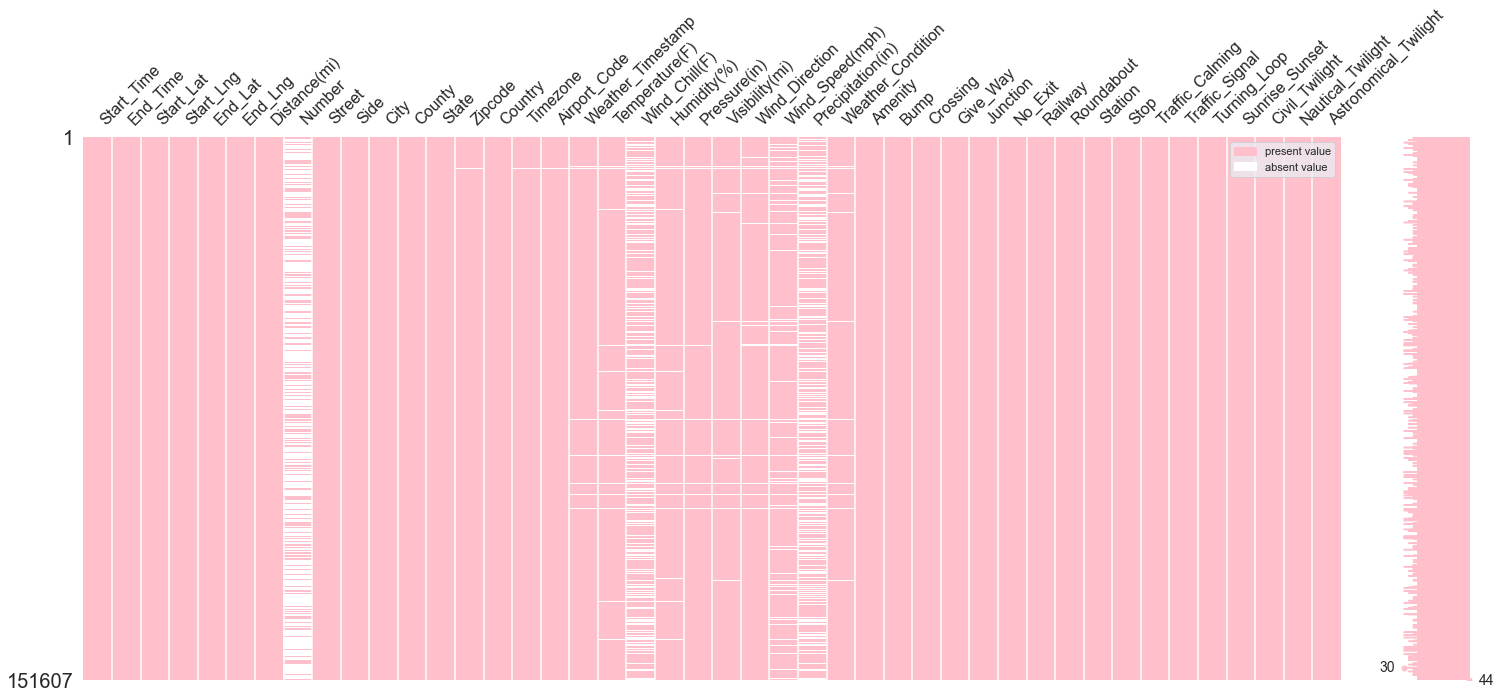

In [6]:
# display missing values in descending
print("Missing values in TRAIN in ascending: \n", missing_percentage(train))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

Missing values in TEST in ascending: 
                         Total  Percent
Number                 104525    68.94
Precipitation(in)       50853    33.54
Wind_Chill(F)           44908    29.62
Wind_Speed(mph)         12895     8.51
Humidity(%)              4584     3.02
Visibility(mi)           4456     2.94
Weather_Condition        4433     2.92
Temperature(F)           4345     2.87
Wind_Direction           4195     2.77
Pressure(in)             3638     2.40
Weather_Timestamp        3013     1.99
Airport_Code              431     0.28
Timezone                  245     0.16
Zipcode                    82     0.05
Sunrise_Sunset              3      NaN
Civil_Twilight              3      NaN
Nautical_Twilight           3      NaN
Astronomical_Twilight       3      NaN
City                        3      NaN


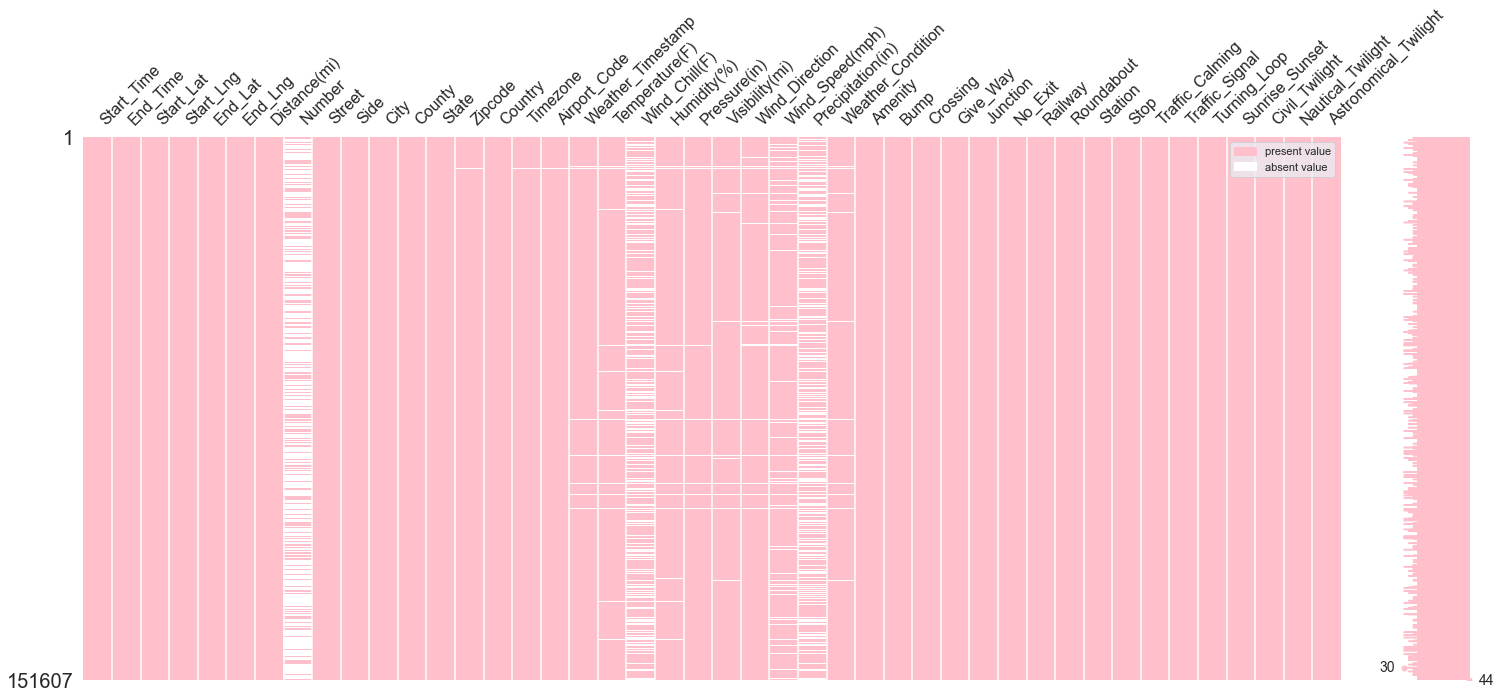

In [7]:
# display missing values in descending
print("Missing values in TEST in ascending: \n", missing_percentage(test))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

Missing values in VALIDATION in ascending: 
                         Total  Percent
Number                 104815    69.14
Precipitation(in)       51332    33.86
Wind_Chill(F)           45147    29.78
Wind_Speed(mph)         12977     8.56
Humidity(%)              4545     3.00
Visibility(mi)           4467     2.95
Weather_Condition        4443     2.93
Temperature(F)           4312     2.84
Wind_Direction           4203     2.77
Pressure(in)             3641     2.40
Weather_Timestamp        3050     2.01
Airport_Code              428     0.28
Timezone                  240     0.16
Zipcode                    99     0.07
Sunrise_Sunset             13     0.01
Civil_Twilight             13     0.01
Nautical_Twilight          13     0.01
Astronomical_Twilight      13     0.01
City                       13     0.01


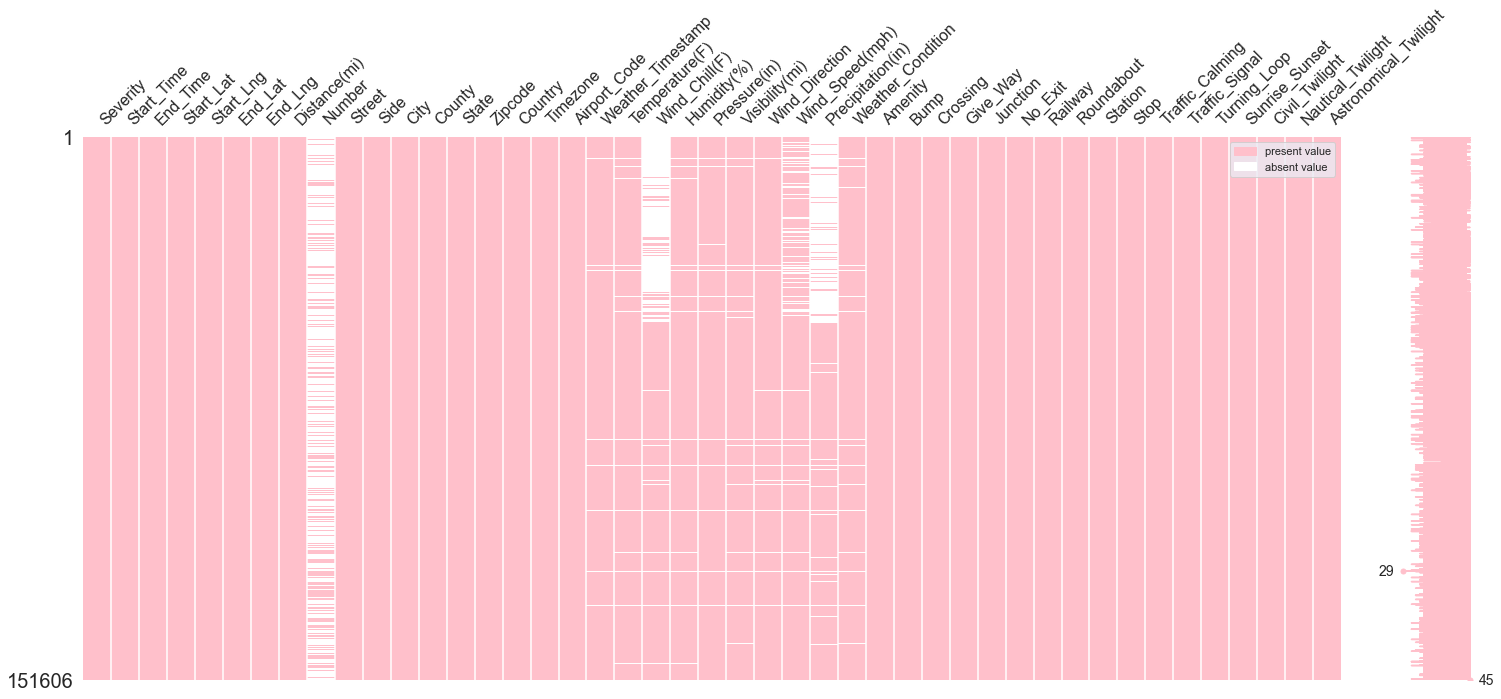

In [8]:
# display missing values in descending
print("Missing values in VALIDATION in ascending: \n", missing_percentage(validation))

# visualize where the missing values are located
msno.matrix(validation, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION

<hr>
+ Only a few missing values of the dataframes suggests that it MIGHT be missing completely at random!
+ There is a strong correlation the strong correlation between `Number`, `Wind Chill(F)` and `Precipitation(in)`.  
+ I'm going to delete any missing column that has IS COMPLETELY AT RANDOM (MCAR) AND the number of missing values is VERY SMALL


Sunrise_Sunset                3

Civil_Twilight                3

Nautical_Twilight             3

Astronomical_Twilight         3

City                          3
<hr>

<a id="2.3.2"></a>
### 2.3.2 Drop missing values pairwise for train and validation set by deleting their rows

In [9]:
# Pairwise delete the rows 
train.dropna(subset=['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'City'],
             how='any', inplace=True)
validation.dropna(subset=['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'City'],
                  how='any', inplace=True)

<a id="2.3.3"></a>
### 2.3.3 Drop missing values listwise for all the datasets by deleting their columns

+ `Street` Shows the street number in address field which too specific for the prediction and have too much missing values (>60%).

+ `Country` shows the dataset is about accidents happening in the United States.

In [10]:
print("Number of categories in Country column - TRAIN:", train.Country.nunique())
print("Categories in TRAIN:", train.Country.unique())

print("Number of categories in Country column - TEST:", test.Country.nunique())
print("Categories in TEST:", test.Country.unique())

print("Number of categories in Country column - VALIDATION:", validation.Country.nunique())
print("Categories in VALIDATION:", validation.Country.unique())

Number of categories in Country column - TRAIN: 1
Categories in TRAIN: <StringArray>
['US']
Length: 1, dtype: string
Number of categories in Country column - TEST: 1
Categories in TEST: <StringArray>
['US']
Length: 1, dtype: string
Number of categories in Country column - VALIDATION: 1
Categories in VALIDATION: <StringArray>
['US']
Length: 1, dtype: string


In [11]:
print("Number of categories:", train.Turning_Loop.nunique())
print("Categories:", train.Turning_Loop.unique())

Number of categories: 1
Categories: <BooleanArray>
[False]
Length: 1, dtype: boolean


In [12]:
print(f'NUMBER OF CATEGORIES: {train.Street.nunique()}; \nUNIQUE NAMES OF THE CATEGORIES {train.Street.unique()}\n')


NUMBER OF CATEGORIES: 53871; 
UNIQUE NAMES OF THE CATEGORIES <StringArray>
[          'US-50 E',            'I-77 N',    'State Route 32',
       'Outerbelt W',           'US-33 S',       'North Fwy N',
            'I-75 S',            'I-70 E',           'I-675 S',
     ' Long Lake Ln',
 ...
 'Dan Brown Hill Rd',   ' Terry Park Cir', ' Hayne Stretch Rd',
    ' Radebaugh Way', ' Marshall Park Ln',    'Point Lobos St',
     'Jennie Lee Ln',     'Sangertown Sq',     ' Kendrick Ave',
      'NFS Road 104']
Length: 53871, dtype: string



### ----------> OBSERVAITON:

<hr>

+ We can remove the country and turning loop column as the data is based on single country and turning loop And we can also check if there are any other columns with single categorical value that can be dropped

+  Number has 64% of missing data and can be removed as this would not be used for analysis. 

+ Street has 53871 unique values which is not meaningful for my further model prediction

+ Precipitation(in) has 57% of missing data but this one is a key factor for rain/snow so can be recovered with these feature columns but the preciptation must be changed to categorical value. + Wind_Chill(F) the percentage of missing data is 53, considering the fact of this feature, this can also be removed.


+  Augmenting with Reverse Geo-Coding.Raw traffic accidentrecords contain only GPS data. The data collection process perform reverse geocoding to translate GPS coordinates toaddresses, each consisting of astreet number,street name,relativeside (left/right),city,county,state,country, andzip-code. This processis same aspoint-wise map-matching.

+ Timezone, Zipcode, Country, City, State, Street, County, Side all have purpose of pointing to the location

+ An US city can have 2 timezones

+ One Postal Code can have 2 cities, ZIP codes do not generally correspond to city and town boundaries, so having a ZIP code associated with a city is no guarantee that an address is actually located in that city. Second of all, ZIP codes actually have multiple names associated with them.

+ However, Timezone, Zipcode have a lot of NA -> drop since I can use columns with similar meaning for further analysis
+ All the values in the Country column is US means this has constant value. All data points were collected at a location
+ `Street` Shows the street number in address field which too specific for the prediction and have too much missing values (>60%).

+ `Country` shows the dataset is about accidents happening in the United States.
<hr>

In [13]:
# drop listwise columns for all datasets
train = train.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)
test = test.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)
validation = validation.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)

<a id="2.3.4"></a>
### 2.3.4 [Interpolate() - Nearest Value imputation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

+ I've sorted all dataframes by their `End_Time`, now I only need to fill na based on the corresponding `Weather_Timestamp` in the previous row. 

+ I could not sort the test data set by the `End_time` since it would mess up my Kaggle result. Moreover, `Weather_Timestamp` approximately equal `Start_Time` and `Start_Time` has no missing value, I'll fill na in `Weather_Timestamp` with `Start_Time` in the test dataset 

In [14]:
# Interpolate the NaNs with nearest value for Weather_Timestamp column
train.Weather_Timestamp.interpolate(method='ffill', inplace=True)
test['Weather_Timestamp'] = test['Weather_Timestamp'].fillna(test['Start_Time'])
validation.Weather_Timestamp.interpolate(method='ffill', inplace=True)

<a id="2.3.5"></a>
### 2.3.5 Median & Frequent Categorical Imputation for Weather Continuous features

Continuous weather features with missing values:

1. Temperature(F)

2. Humidity(%)

3. Pressure(in)

4. Visibility(mi)

5. Wind_Speed(mph)

`apply` + `pd.to_numeric` + `mask` + `fillna`

**According to the "A Countrywide Traffic Accident Dataset":** 
"Weather Underground API to obtain weather information for each accident. Raw weather data was collected from 1,977 **weather stations located in airports** all around the United States."

+ Grouped by location and time. 'Airport_Code' is selected as location feature because the sources of weather data are airport-based weather stations. 

+ Then the data will be grouped by 'Start_Month' rather than 'Start_Hour' because using the former is computationally cheaper and remains less missing values. Finally, missing values will be replaced by median value of each group.

In [15]:
train.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [16]:
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

def get_hours(df, column):
    return df[column].apply(lambda date: date[11:13])


# TRAIN
train['Start_Time_Month'] = get_months(train, 'Start_Time')
train['Start_Time_Year'] = get_years(train, 'Start_Time')
train['Start_Time_Hour'] = get_hours(train, 'Start_Time')

train['End_Time_Month'] = get_months(train, 'End_Time')
train['End_Time_Year'] = get_years(train, 'End_Time')
train['End_Time_Hour'] = get_hours(train, 'End_Time')

train['Weather_Timestamp_Month'] = get_months(train, 'Weather_Timestamp')
train['Weather_Timestamp_Year'] = get_years(train, 'Weather_Timestamp')
train['Weather_Time_Hour'] = get_hours(train, 'Weather_Timestamp')

# TEST
test['Start_Time_Month'] = get_months(test, 'Start_Time')
test['Start_Time_Year'] = get_years(test, 'Start_Time')
test['Start_Time_Hour'] = get_hours(test, 'Start_Time')

test['End_Time_Month'] = get_months(test, 'End_Time')
test['End_Time_Year'] = get_years(test, 'End_Time')
test['End_Time_Hour'] = get_hours(test, 'End_Time')

test['Weather_Timestamp_Month'] = get_months(test, 'Weather_Timestamp')
test['Weather_Timestamp_Year'] = get_years(test, 'Weather_Timestamp')
test['Weather_Time_Hour'] = get_hours(test, 'Weather_Timestamp')

# VALIDATION
validation['Start_Time_Month'] = get_months(validation, 'Start_Time')
validation['Start_Time_Year'] = get_years(validation, 'Start_Time')
validation['Start_Time_Hour'] = get_hours(validation, 'Start_Time')

validation['End_Time_Month'] = get_months(validation, 'End_Time')
validation['End_Time_Year'] = get_years(validation, 'End_Time')
validation['End_Time_Hour'] = get_hours(validation, 'End_Time')

validation['Weather_Timestamp_Month'] = get_months(validation, 'Weather_Timestamp')
validation['Weather_Timestamp_Year'] = get_years(validation, 'Weather_Timestamp')
validation['Weather_Time_Hour'] = get_hours(validation, 'Weather_Timestamp')


# Drop original colums
train = train.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)
test = test.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)
validation = validation.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)

In [17]:
train.head(3)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,Start_Time_Hour,End_Time_Month,End_Time_Year,End_Time_Hour,Weather_Timestamp_Month,Weather_Timestamp_Year,Weather_Time_Hour
377127,2,39.10148,-84.52341,39.09841,-84.52241,0.219,R,Cincinnati,Hamilton,OH,45202,US/Eastern,KLUK,36.0,97,29.7,10.0,Calm,<NA>,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,Night,Night,Night,Day,02,2016,06,02,2016,12,02,2016,05
108963,2,41.06213,-81.53784,41.06217,-81.53547,0.123,R,Akron,Summit,OH,44311,US/Eastern,KAKR,39.0,55,29.65,10.0,Calm,<NA>,<NA>,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,02,2016,06,02,2016,12,02,2016,06
410084,2,39.06324,-84.03243,39.06731,-84.05851,1.427,R,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,35.6,100,29.66,10.0,WSW,8.1,<NA>,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,02,2016,08,02,2016,14,02,2016,08


In [18]:
# from collections import Counter
# %time
# # replace the missing nan values with normal distribution depending on different time period
# train['Airport_Code'] = train['Airport_Code'].fillna(train['Airport_Code'].mode()[0]) 

# weather_columns = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# def fill_na_Temperature(df):
#         # Take the median of the weather condition for the Start_Time_Hour in the Start_Time_Month to fillna
#         df['Temperature(F)'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Hour'])[
#             'Temperature(F)'].apply(
#             lambda x: x.fillna(x.median()))
#         print('Temperature(F)' + " fill type 1 for Nan   : " + df['Temperature(F)'].isnull().sum().astype(str))
#         # Take the median of the weather condition for a Start_Time_Month in the Start_Time_Year to fillna
#         df['Temperature(F)'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month'])['Temperature(F)'].apply(lambda x: x.fillna(x.median()))
#         print('Temperature(F)' + " fill type 2 for Nan : " + df['Temperature(F)'].isnull().sum().astype(str))
#         df['Temperature(F)'] = df.groupby(['Airport_Code', 'Start_Time_Year'])['Temperature(F)'].apply(lambda x: x.fillna(x.median()))
#         print('Temperature(F)' + " fill type 3 for Nan : " + df['Temperature(F)'].isnull().sum().astype(str))

# fill_na_Temperature(train)
# fill_na_Temperature(test)
# fill_na_Temperature(validation)



# def fill_na_Humidity(df):
#     # Take the median of the weather condition for the Start_Time_Hour in the Start_Time_Month to fillna
#     df['Humidity(%)'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Hour'])[
#         'Humidity(%)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Humidity(%)' + " fill type 1 for Nan   : " + df['Humidity(%)'].isnull().sum().astype(str))
#     # Take the median of the weather condition for a Start_Time_Month in the Start_Time_Year to fillna
#     df['Humidity(%)'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month'])['Humidity(%)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Humidity(%)' + " fill type 2 for Nan : " + df['Humidity(%)'].isnull().sum().astype(str))
#     df['Humidity(%)'] = df.groupby(['Airport_Code', 'Start_Time_Year'])['Humidity(%)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Humidity(%)' + " fill type 3 for Nan : " + df['Humidity(%)'].isnull().sum().astype(str))
    
# fill_na_Humidity(train)
# fill_na_Humidity(test)
# fill_na_Humidity(validation)


# def fill_na_Pressure(df):
#     # Take the median of the weather condition for the Start_Time_Hour in the Start_Time_Month to fillna
#     df['Pressure(in)'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Hour'])[
#         'Pressure(in)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Pressure(in)' + " fill type 1 for Nan   : " + df['Pressure(in)'].isnull().sum().astype(str))
#     # Take the median of the weather condition for a Start_Time_Month in the Start_Time_Year to fillna
#     df['Pressure(in)'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month'])['Pressure(in)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Pressure(in)' + " fill type 2 for Nan : " + df['Pressure(in)'].isnull().sum().astype(str))
#     df['Pressure(in)'] = df.groupby(['Airport_Code', 'Start_Time_Year'])['Pressure(in)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Pressure(in)' + " fill type 3 for Nan : " + df['Pressure(in)'].isnull().sum().astype(str))
 
# fill_na_Pressure(train)
# fill_na_Pressure(test)
# fill_na_Pressure(validation)


# def fill_na_Visibility(df):
#     # Take the median of the weather condition for the Start_Time_Hour in the Start_Time_Month to fillna
#     df['Visibility(mi)'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Hour'])[
#         'Visibility(mi)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Visibility(mi)' + " fill type 1 for Nan   : " + df['Visibility(mi)'].isnull().sum().astype(str))
#     # Take the median of the weather condition for a Start_Time_Month in the Start_Time_Year to fillna
#     df['Visibility(mi)'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month'])['Visibility(mi)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Visibility(mi)' + " fill type 2 for Nan : " + df['Visibility(mi)'].isnull().sum().astype(str))
#     df['Visibility(mi)'] = df.groupby(['Airport_Code', 'Start_Time_Year'])['Visibility(mi)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Visibility(mi)' + " fill type 3 for Nan : " + df['Visibility(mi)'].isnull().sum().astype(str))
    
# fill_na_Visibility(train)
# fill_na_Visibility(test)
# fill_na_Visibility(validation)


# def fill_na_Wind_Speed(df):
#     # Take the median of the weather condition for the Start_Time_Hour in the Start_Time_Month to fillna
#     df['Wind_Speed(mph)'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Hour'])[
#         'Wind_Speed(mph)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Wind_Speed(mph)' + " fill type 1 for Nan   : " + df['Wind_Speed(mph)'].isnull().sum().astype(str))
#     # Take the median of the weather condition for a Start_Time_Month in the Start_Time_Year to fillna
#     df['Wind_Speed(mph)'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month'])['Wind_Speed(mph)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Wind_Speed(mph)' + " fill type 2 for Nan : " + df['Wind_Speed(mph)'].isnull().sum().astype(str))
#     df['Wind_Speed(mph)'] = df.groupby(['Airport_Code', 'Start_Time_Year'])['Wind_Speed(mph)'].apply(
#         lambda x: x.fillna(x.median()))
#     print('Wind_Speed(mph)' + " fill type 3 for Nan : " + df['Wind_Speed(mph)'].isnull().sum().astype(str))
    
# fill_na_Wind_Speed(train)
# fill_na_Wind_Speed(test)
# fill_na_Wind_Speed(validation)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs
Temperature(F) fill type 1 for Nan   : 8191
Temperature(F) fill type 2 for Nan : 6048
Temperature(F) fill type 3 for Nan : 3364
Temperature(F) fill type 1 for Nan   : 3534
Temperature(F) fill type 2 for Nan : 2588
Temperature(F) fill type 3 for Nan : 1633
Temperature(F) fill type 1 for Nan   : 3511
Temperature(F) fill type 2 for Nan : 2571
Temperature(F) fill type 3 for Nan : 1633


TypeError: cannot safely cast non-equivalent float64 to int64

In [19]:
missing_percentage(train)

,Total,Percent
Precipitation(in),153413,33.73
Wind_Speed(mph),38716,8.51
Humidity(%),13670,3.01
Visibility(mi),13276,2.92
Weather_Condition,13196,2.90
Wind_Direction,12570,2.76
Pressure(in),10865,2.39
Temperature(F),3364,0.74
Timezone,690,0.15
Zipcode,277,0.06


In [20]:
%time
from collections import Counter

def fill_mode_wind_direction(df):
    # grouping data to fill NAs with majority value
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Hour'])['Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 1 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))
    
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month'])['Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 2 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))
    
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Month'])['Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 3 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))


fill_mode_wind_direction(train)
fill_mode_wind_direction(test)
fill_mode_wind_direction(validation)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
Wind_Direction fill type 1 for Nan : 9395
Wind_Direction fill type 2 for Nan : 7326
Wind_Direction fill type 3 for Nan : 6464
Wind_Direction fill type 1 for Nan : 3684
Wind_Direction fill type 2 for Nan : 2968
Wind_Direction fill type 3 for Nan : 2652
Wind_Direction fill type 1 for Nan : 3644
Wind_Direction fill type 2 for Nan : 2945
Wind_Direction fill type 3 for Nan : 2678


### -------------> OBSERVATION
<hr>
There still are some missing values but much less. Impute median by these features for the sake of simplicity.
<hr>

<a id="2.3.6"></a>
### 2.3.6 Impute Median and Mode for the rest- assume that there is random order of missing values 

In [21]:
# select numeric columns
numeric = train.select_dtypes(include=[np.number])
train_numeric = numeric.columns.tolist()

numeric = validation.select_dtypes(include=[np.number])
validation_numeric = numeric.columns.tolist()

numeric = test.select_dtypes(include=[np.number])
test_numeric = numeric.columns.tolist()

def impute_median_num_col(df, numeric_col):
    # Imputes mode to NAN to the rest of categorical columns 
    for column in numeric_col:
        df[column].fillna(df[column].median(), inplace=True)

impute_median_num_col(train, train_numeric)
impute_median_num_col(test, test_numeric)
impute_median_num_col(validation, validation_numeric)



# select non-numeric columns
train_string = train.select_dtypes(include='string')
test_string = test.select_dtypes(include='string')
validation_string = validation.select_dtypes(include='string')


def impute_mode_num_col(df, string_col):
    # Imputes mode to NAN to the rest of categorical columns 
    for column in string_col:
        df[column].fillna(df[column].mode()[0], inplace=True)

impute_mode_num_col(train, train_string)
impute_mode_num_col(test, test_string)
impute_mode_num_col(validation, validation_string)

In [22]:
# display missing values in descending
missing_percentage(train)

,Total,Percent


<br><br>
<a id="2.4"></a>
# 2.4 Shorten and Simplify categories 

<a id="2.4.1"></a>
### 2.4.1 Time-series columns - break them down into hour, minute, and weekday 

### Number of accidents for hour

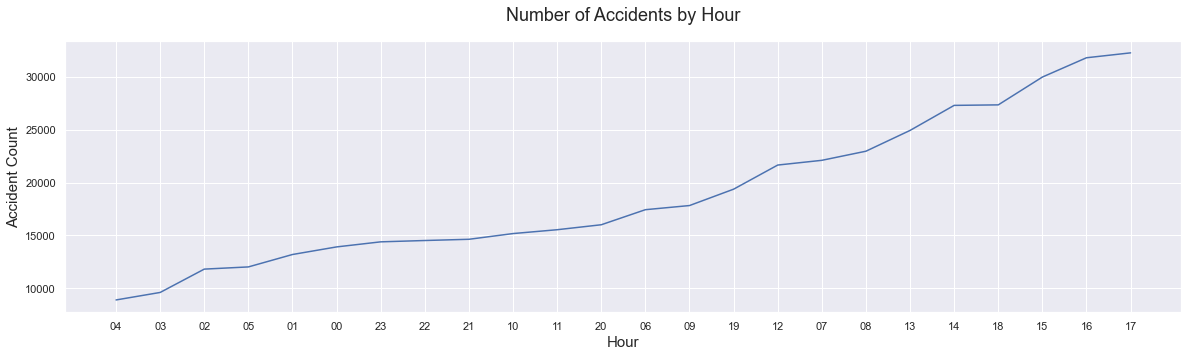

In [23]:
# get the accident count for each hour
df_hour = train['Start_Time_Hour'].value_counts().to_frame().reset_index().sort_values('Start_Time_Hour')
df_hour.columns = ['Hour', 'Counts']

# set fig size
plt.figure(figsize=(20, 5))
#set grid style
sns.set_style("darkgrid")
# crete a line plot for accident count for each hours as a time series
sns.lineplot(x='Hour', y='Counts', data=df_hour)
# set label, ticks and title
plt.xticks(df_hour['Hour'])
plt.ylabel('Accident Count', size=15)
plt.xlabel('Hour', size=15)
plt.title('Number of Accidents by Hour', size=18, y=1.05)
# show graph
plt.show()

### Number of accidents for Month

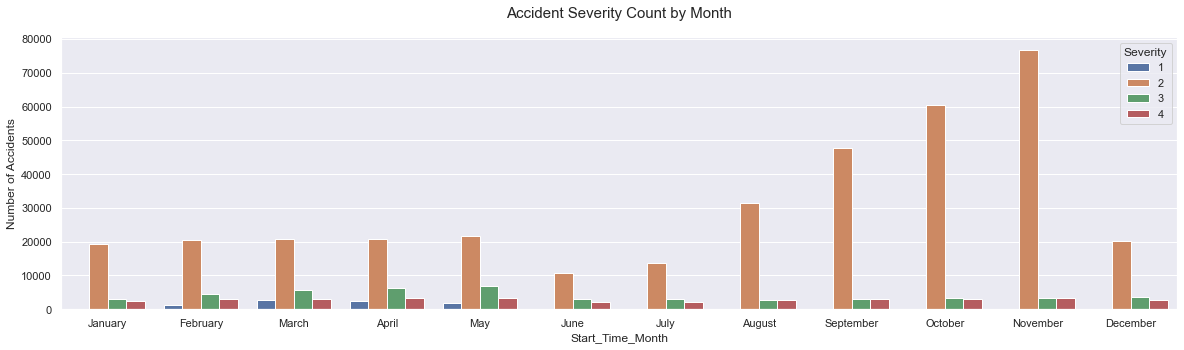

In [24]:
# import calendar for getting the month and week names
import calendar

# define the plot size
plt.figure(figsize=(20, 5))

# create count plot for severity for each month
sns.countplot(x='Start_Time_Month', hue='Severity', data=train)

# set itle, labels and ticks
plt.title('Accident Severity Count by Month', size=15, y=1.05)
plt.ylabel("Number of Accidents")
plt.xticks(np.arange(0, 12, 1), calendar.month_name[1:13])
# plt.yticks(np.linspace(25000,250000,6))

#show plot
plt.show()

### Number of accidents for Year

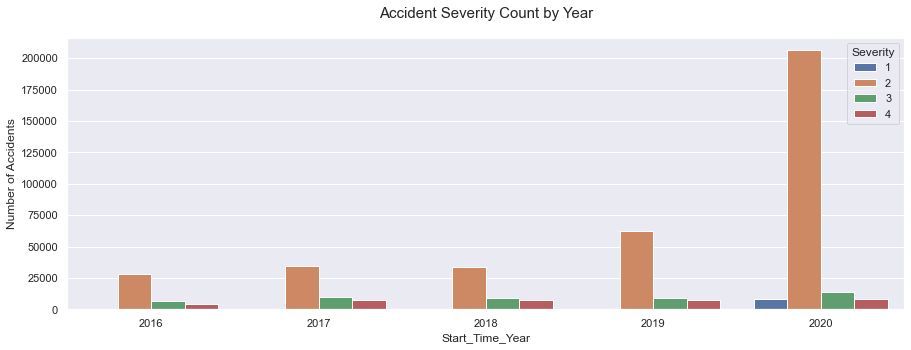

In [25]:
# define the figure size
plt.figure(figsize=(15, 5))

# create count plot for severity for each year
sns.countplot(x='Start_Time_Year', hue='Severity', data=train)

# set the ticks, labels and title
plt.title('Accident Severity Count by Year', size=15, y=1.05)
plt.ylabel("Number of Accidents")

# show plot
plt.show()

<a id="2.4.2"></a>
### 2.4.2 Shorten & Simplify the Wind Direction

In [26]:
train.Wind_Direction.value_counts()

CALM        69697
Calm        24273
WNW         23498
NW          22910
W           22023
SSW         20986
WSW         20837
NNW         20557
S           20457
SW          19755
SSE         19628
SE          16651
N           16319
E           15812
ESE         15573
ENE         15299
NE          14702
NNE         14058
VAR         12346
West        12276
South       12144
North       10757
East         7241
Variable     6997
Name: Wind_Direction, dtype: Int64

In [27]:
def simplify_wind_direction(df):
    df.loc[df['Wind_Direction'] == 'Calm', 'Wind_Direction'] = 'CALM'
    df.loc[(df['Wind_Direction'] == 'West') | (df['Wind_Direction'] == 'WSW') | (
            df['Wind_Direction'] == 'WNW'), 'Wind_Direction'] = 'W'
    df.loc[(df['Wind_Direction'] == 'South') | (df['Wind_Direction'] == 'SSW') | (
            df['Wind_Direction'] == 'SSE'), 'Wind_Direction'] = 'S'
    df.loc[(df['Wind_Direction'] == 'North') | (df['Wind_Direction'] == 'NNW') | (
            df['Wind_Direction'] == 'NNE'), 'Wind_Direction'] = 'N'
    df.loc[(df['Wind_Direction'] == 'East') | (df['Wind_Direction'] == 'ESE') | (
            df['Wind_Direction'] == 'ENE'), 'Wind_Direction'] = 'E'
    df.loc[df['Wind_Direction'] == 'Variable', 'Wind_Direction'] = 'VAR'
    print("Wind Direction after simplification: ", df['Wind_Direction'].unique())


simplify_wind_direction(train)
simplify_wind_direction(test)
simplify_wind_direction(validation)

Wind Direction after simplification:  <StringArray>
['CALM', 'W', 'SW', 'NW', 'N', 'S', 'E', 'VAR', 'SE', 'NE']
Length: 10, dtype: string
Wind Direction after simplification:  <StringArray>
['CALM', 'W', 'E', 'S', 'NW', 'N', 'SW', 'NE', 'SE', 'VAR']
Length: 10, dtype: string
Wind Direction after simplification:  <StringArray>
['W', 'CALM', 'N', 'NW', 'SE', 'S', 'E', 'SW', 'NE', 'VAR']
Length: 10, dtype: string


<a id="2.4.3"></a>
### 2.4.3 Shorten ad Simplify the Weather Condition

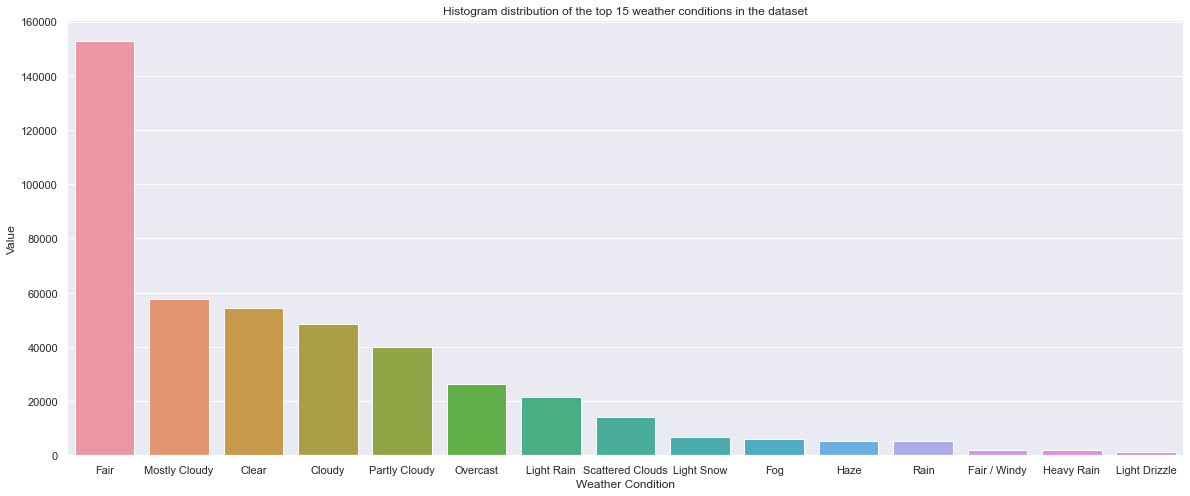

In [28]:
counts = train["Weather_Condition"].value_counts()[:15]
plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 15 weather conditions in the dataset")
sns.barplot(counts.index, counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.show()

### -----------> OBSERVATION
<hr>
According to Road Weather Management Program, most weather-related crashes happen on wet-pavement and during rainfall. Winter-condition and fog are another two main reasons for weather-related accidents. 

To extract these three weather conditions, we first look at what we have in 'Weather_Condition' Feature.
<hr>

In [29]:
train.Weather_Condition.value_counts()

Fair                            152815
Mostly Cloudy                    57681
Clear                            54287
Cloudy                           48247
Partly Cloudy                    40041
Overcast                         26284
Light Rain                       21610
Scattered Clouds                 14114
Light Snow                        6683
Fog                               5909
Haze                              5288
Rain                              5206
Fair / Windy                      1975
Heavy Rain                        1933
Light Drizzle                     1325
Smoke                             1130
Mostly Cloudy / Windy             1125
Cloudy / Windy                     978
Snow                               831
Partly Cloudy / Windy              638
Light Rain / Windy                 581
T-Storm                            463
Thunder in the Vicinity            386
Wintry Mix                         376
Light Rain with Thunder            350
Thunder                  

In [30]:
def simplify_weather_condition(df):
    df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
    df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
    df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
    df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
    df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
    df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
    df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
    df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
    df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
    df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
    df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

    print(df["Weather_Condition"].unique())


simplify_weather_condition(train)
simplify_weather_condition(test)
simplify_weather_condition(validation)

train_unique_weather = train["Weather_Condition"].unique()
test_unique_weather = test["Weather_Condition"].unique()
validation_unique_weather = validation["Weather_Condition"].unique()

<StringArray>
[      'Cloudy',         'Snow',        'Clear',         'Rain',
          'Fog', 'Thunderstorm',        'Windy',         'Hail',
        'Smoke',         'Sand',           <NA>,      'Tornado']
Length: 12, dtype: string
<StringArray>
[       'Clear',       'Cloudy',        'Windy',          'Fog',
         'Sand',         'Snow',         'Rain',        'Smoke',
         'Hail',           <NA>, 'Thunderstorm']
Length: 11, dtype: string
<StringArray>
[      'Cloudy',         'Snow',        'Clear',         'Rain',
          'Fog',        'Smoke', 'Thunderstorm',         'Hail',
        'Windy',           <NA>,         'Sand']
Length: 11, dtype: string


<br><br>
<a id="2.5"></a>
# 2.5 Typos
<a id="2.5.1"></a>
### 2.5.1 Check general spelling errors

In [31]:
train_string = train.select_dtypes(include='string')

# Check if spelling errors, shoul clean further if the number of before checking and after checking are different
for col in train_string:
    print(f'Before: {col}: {len(set(train[col]))}; After: {col}: {len(set(train[col].str.title().str.strip()))}')

Before: Side: 2; After: Side: 2
Before: City: 8887; After: City: 8854
Before: County: 1535; After: County: 1522
Before: State: 49; After: State: 49
Before: Zipcode: 83284; After: Zipcode: 83284
Before: Timezone: 4; After: Timezone: 4
Before: Airport_Code: 1884; After: Airport_Code: 1884
Before: Wind_Direction: 10; After: Wind_Direction: 10
Before: Weather_Condition: 12; After: Weather_Condition: 12
Before: Sunrise_Sunset: 2; After: Sunrise_Sunset: 2
Before: Civil_Twilight: 2; After: Civil_Twilight: 2
Before: Nautical_Twilight: 2; After: Nautical_Twilight: 2
Before: Astronomical_Twilight: 2; After: Astronomical_Twilight: 2


### ----------> OBSERVATION
<hr>
Indeed, there are typos in the `Street`, `City`, `County`, `Wind_Direction`. Let's fix it.
<hr>

In [32]:
# Correct the errors
# train.Street = train.Street.str.title().str.strip()
train.City = train.City.str.title().str.strip()
train.County = train.County.str.title().str.strip()
train.Wind_Direction = train.Wind_Direction.str.title().str.strip()

# Correct the errors
# test.Street = test.Street.str.title().str.strip()
test.City = test.City.str.title().str.strip()
test.County = test.County.str.title().str.strip()
test.Wind_Direction = test.Wind_Direction.str.title().str.strip()

# validation.Street = validation.Street.str.title().str.strip()
validation.City = validation.City.str.title().str.strip()
validation.County = validation.County.str.title().str.strip()
validation.Wind_Direction = validation.Wind_Direction.str.title().str.strip()

In [33]:
# Check if spelling errors already fixed
for col in train_string:
    print(f'Before: {col}: {len(set(train[col]))}; After: {col}: {len(set(train[col].str.title().str.strip()))}')

Before: Side: 2; After: Side: 2
Before: City: 8854; After: City: 8854
Before: County: 1522; After: County: 1522
Before: State: 49; After: State: 49
Before: Zipcode: 83284; After: Zipcode: 83284
Before: Timezone: 4; After: Timezone: 4
Before: Airport_Code: 1884; After: Airport_Code: 1884
Before: Wind_Direction: 10; After: Wind_Direction: 10
Before: Weather_Condition: 12; After: Weather_Condition: 12
Before: Sunrise_Sunset: 2; After: Sunrise_Sunset: 2
Before: Civil_Twilight: 2; After: Civil_Twilight: 2
Before: Nautical_Twilight: 2; After: Nautical_Twilight: 2
Before: Astronomical_Twilight: 2; After: Astronomical_Twilight: 2


<a id="2.5.2"></a>
### 2.5.2 Extra-whitespaces
Check whether there are instances of extra whitespaces and trim them in the data 

In [34]:
from function import whitespace_remover

"""
        Remove extra leading and tailing whitespace from the data.
         pass dataframe as a parameter and apply whitespace_remover function on dataframe
"""

whitespace_remover(train)
whitespace_remover(test)
whitespace_remover(validation)

<a id="2.5.3"></a>
### 2.5.3 Lower-case all values in each column

+ Categorical data should have all the uniform formatting style, such as lower case. 
+ I will cast all categorical data to lower case except the test set since I dont want my ID columns to be in lower case to match the ID in Kaggle competition

In [35]:
# Cast all values inside the dataframe (except the columns' name) into lowercase
train = train.applymap(lambda s: s.lower() if type(s) == str else s)
# test = test.applymap(lambda s: s.lower() if type(s) == str else s) // I dont want my ID to be lower case to match the ID in Kaggle competition
validation = validation.applymap(lambda s: s.lower() if type(s) == str else s)

<br><br>
<a id="2.6"></a>
# 2.6 Sanity checks
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.
<a id="2.6.1"></a>
### 2.6.1 Check duplication
+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

+ Could not drop duplicated in TEST since I'll use it to compete in Kaggle learboard

In [36]:
# TRAIN
print("Number of rows before drop of duplicates  in TRAIN:", len(train.index))
print("Number of duplicated records in TRAIN: ", train.duplicated().sum())
train.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in TRAIN:", len(train.index), "\n\n")


# VALIDATION
print("Number of rows before drop of duplicates in VALIDATION:", len(validation.index))
print("Number of duplicated records in VALIDATION: ", validation.duplicated().sum())
validation.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in VALIDATION:", len(validation.index))

Number of rows before drop of duplicates  in TRAIN: 454796
Number of duplicated records in TRAIN:  15679
Number of rows after drop of duplicates in TRAIN: 439117 


Number of rows before drop of duplicates in VALIDATION: 151593
Number of duplicated records in VALIDATION:  1871
Number of rows after drop of duplicates in VALIDATION: 149722


<a id="2.6.2"></a>
### 2.6.2 Impossible values

In [37]:
train.describe().round(2)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00
mean,2.24,36.93,-98.73,36.93,-98.73,0.59,59.68,64.69,29.57,9.15,7.59,0.01
std,0.61,5.16,18.48,5.16,18.48,1.63,18.18,22.96,1.00,2.87,5.25,0.10
min,1.00,24.57,-124.50,24.57,-124.50,0.00,-89.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,33.86,-118.22,33.86,-118.22,0.00,48.00,49.00,29.47,10.00,4.60,0.00
50%,2.00,37.35,-94.53,37.36,-94.53,0.18,61.00,68.00,29.88,10.00,7.00,0.00
75%,2.00,40.73,-80.94,40.73,-80.94,0.59,73.00,84.00,30.04,10.00,10.00,0.00
max,4.00,49.00,-67.40,49.00,-67.40,150.14,168.80,100.00,38.94,120.00,518.00,24.00


### -----> OSERVATION

<hr>

The **minimum value for "Pressure(in)", "Visibility(mi)" is 0**, meaning that some records are missing them and replaced them by putting zeros. For this reason, I'm going to drop the records for these two columns.
<hr>

In [38]:
train = train[train["Pressure(in)"] != 0]
train = train[train["Visibility(mi)"] != 0]

# Drop rows that have Pressure and Visibility equal and below 0
validation = validation[validation["Pressure(in)"] != 0]
validation = validation[validation["Visibility(mi)"] != 0]


print("TRAIN DATASET: ")
print(train[["Pressure(in)", "Visibility(mi)"]].describe().round(2))

print("VALIDATION DATASET: ")
print(validation[["Pressure(in)", "Visibility(mi)"]].describe().round(2))

TRAIN DATASET: 
       Pressure(in)  Visibility(mi)
count     438700.00       438700.00
mean          29.57            9.16
std            1.00            2.86
min            0.30            0.06
25%           29.47           10.00
50%           29.88           10.00
75%           30.04           10.00
max           38.94          120.00
VALIDATION DATASET: 
       Pressure(in)  Visibility(mi)
count     149582.00       149582.00
mean          29.57            9.16
std            1.00            2.89
min           19.89            0.06
25%           29.47           10.00
50%           29.88           10.00
75%           30.04           10.00
max           58.04          140.00


<br><br>
<a id="2.7"></a>
# 2.7 Extra exploration and visualization
<a id="2.7.1"></a>
### 2.7.1 Medium distance by severity
Let's now analyze the medium distance of an accident based on its severity.

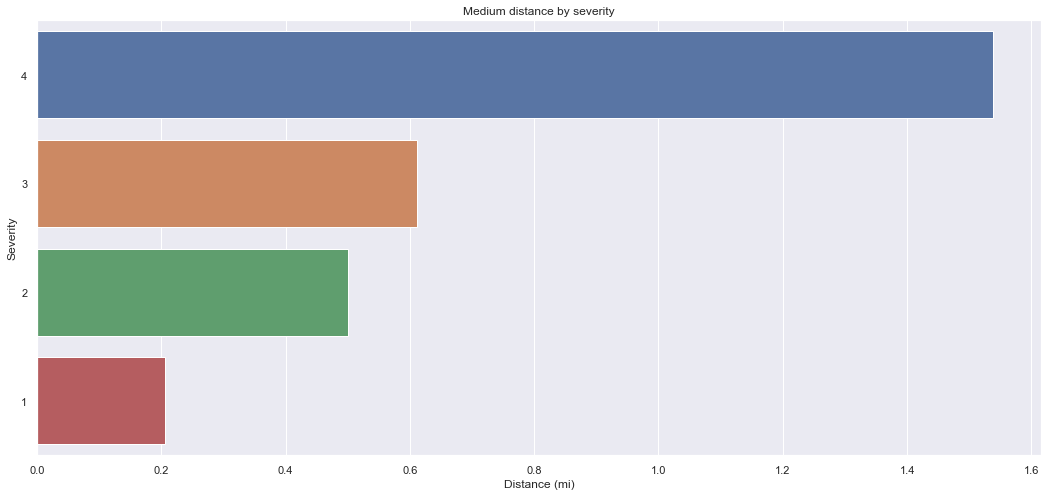

In [39]:
severity_distance = train.groupby("Severity").mean()["Distance(mi)"].sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Medium distance by severity")
sns.barplot(severity_distance.values, severity_distance.index, orient="h", order=severity_distance.index)
plt.xlabel("Distance (mi)")
plt.show()

### ------------> OBSERVATION

<hr>
In this graph we can see that the distance of the accident is more or less proportional to the severity, and in fact accidents with severity 4 have the longest distance.
<hr>

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


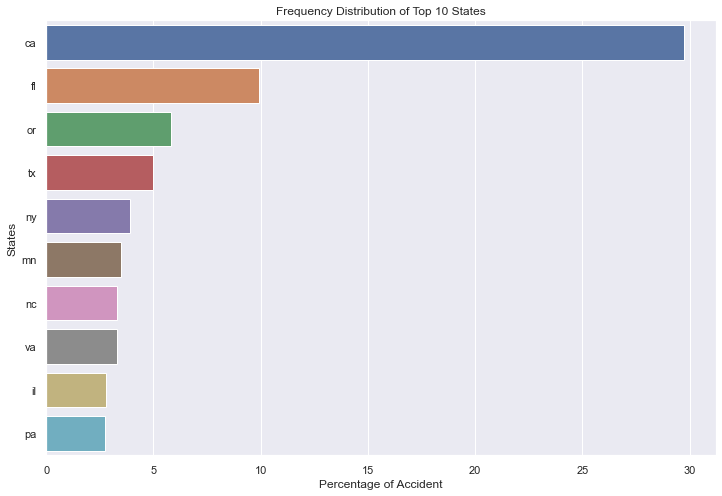

In [40]:
%time
# visualize top 10 states having the most accidents
state_percentage = train['State'].value_counts() * 100 / len(train)

# state_count
plt.figure(figsize=(12, 8))
sns.barplot(state_percentage.values[:10], state_percentage.index[:10])
plt.title('Frequency Distribution of Top 10 States')

plt.ylabel('States', fontsize=12)
plt.xlabel('Percentage of Accident', fontsize=12)
plt.show()

### ----------> OBSERVATION
<hr>
As we can clearly see, the state having the most number of accidents is California followed by Florida.
<hr>

<a id="2.7.2"></a>
### 2.7.2 Longtitude and Latitude
As, we can see the density of points is more at the eastern and western coasts as compared to the middle of the country

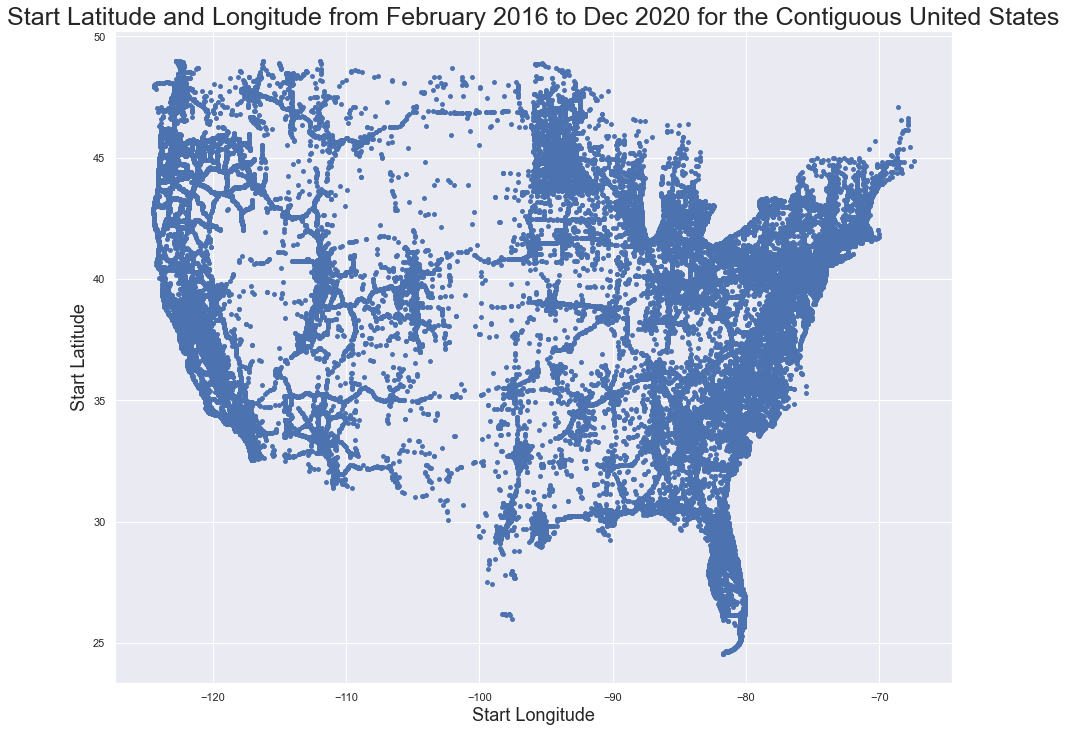

In [41]:
from matplotlib import pyplot as plt

# Make scatter for Latitude and Longitude
plt.figure(figsize=(15, 12))
plt.scatter(x=train.Start_Lng, y=train.Start_Lat, s=15)
plt.title("Start Latitude and Longitude from February 2016 to Dec 2020 for the Contiguous United States", fontsize=25)
plt.xlabel("Start Longitude", fontsize=18)
plt.ylabel("Start Latitude", fontsize=18)
plt.show()

<a id="2.7.3"></a>
### 2.7.3 Most frequent street type of an accident with severity 
We are going to compute the most frequent words in the description column of the accidents with a value of severity equal to 4, using some stopwords from the english language.

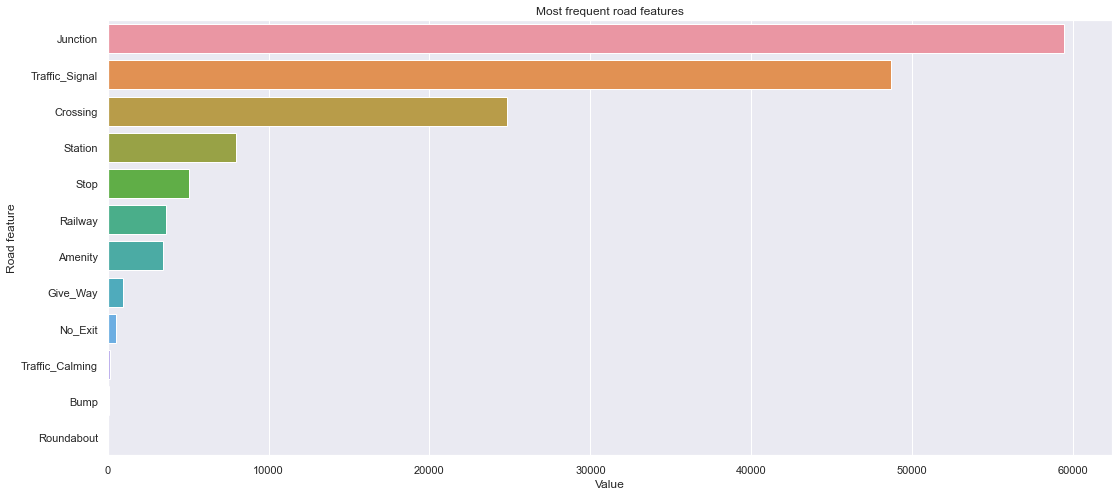

In [42]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station",
                 "Stop", "Traffic_Calming", "Traffic_Signal"]
data = train[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(data.values, data.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

### ---------> OBSERVATION

<hr>

+ As we can see, most of the accidents occured near a traffic signal, expecially where a junction or a crossing was present.
+ The fourth most common road feature, instead, was the presence of a nearby station, probably because of the high presence of vehicles.

<hr>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Conclusion</strong></h1>

+ The number of unique cities where accidents have taken place in USA: 10658
+ The Top 5 cities of USA with maximum number of accidents in 4 years are: Los Angeles, Miami, Charlotte, Houston, Dallas
+ The percentage of cities have more than 1000 accidents in a year is: 2.3552594538800786%
+ 1167 cities of USA have had only accident in 4 years!
+ The maximum number of accidents have taken place at around 4-5P.M. which can be a result of the fact that most people are travelling back to their homes after work which causes a rush hour.
+ Suprisingly, maximum number of accidents occured on a Thursday and not on a weekend. This means that maybe, not a lot of people travel on the weekends
+ Los Angeles is the city with highest number of accidents in USA (2016-2020)
+ Miami is the city with 2nd highest number of accidents in USA (2016-2020)
+ California is the State with highest number of accidents in USA (2016-2020)
+ Florida is the state with 2nd highest number of accidents in USA (2016-2020)
+ In 80% Cases of road accidents, the impact on the traffic was Moderate - 2
+ In 10% Cases of road accidents, the impact on the traffic was Severe - 3

### WRITING CLEANED DATA BACK TO FILES
After completing your analysis and adding new columns, I write the results back to a file and get that data to visualize on Dash App. Otherwise, the data will be lost when the Jupyter Lab shuts down.

In [43]:
# To write the data from the data frame into a file, use the to_csv function.
train.to_csv('cosc2789-2021/cleaned_train.csv', index=False)
test.to_csv('cosc2789-2021/cleaned_test.csv', index=False)
validation.to_csv('cosc2789-2021/cleaned_validation.csv', index=False)
print("Cleaned data was successfully saved!")

Cleaned data was successfully saved!


<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Feature Engineering</strong></h1>

In [44]:
print(train.shape)
print(test.shape)
print(validation.shape)

(438700, 46)
(151607, 45)
(149582, 46)


# REFERENCES
+ Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. [“A Countrywide Traffic Accident Dataset.”](https://arxiv.org/abs/1906.05409), arXiv preprint arXiv:1906.05409 (2019). Access Nov 27, 2021.

+ Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. [“Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.”](https://arxiv.org/abs/1909.09638) In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019. Access Nov 27, 2021.

[14] Sobhan Moosavi, Mohammad Hossein Samavatian, Arnab Nandi, Srinivasan
Parthasarathy, and Rajiv Ramnath. 2019. Short and Long-term Pattern Discovery
Over Large-Scale Geo-Spatiotemporal Data. In Proceedings of the 25th ACM
SIGKDD International Conference on Knowledge Discovery & Data Mining. ACM.

<a href="https://towardsdatascience.com/usa-accidents-data-analysis-d130843cde02">USA Accidents Data Analysis</a>

https://www.kaggle.com/sobhanmoosavi/us-accidents/discussion/113055

<a href="https://www.kaggle.com/deepakdeepu8978/how-severity-the-accidents-is">how Severity the Accidents is ?</a>

<a href="https://www.kaggle.com/trivenisaraswathi/severity-prediction-in-sfo-bay-area">Severity Prediction in SFO Bay Area</a>

<a href="https://www.kaggle.com/phip2014/ml-to-predict-accident-severity-pa-mont"> ML to Predict Accident Severity_PA_Mont</a>

<a href="https://www.kaggle.com/suyash0010/severity-and-time-wasted-analysis"> severity and hours wasted</a>

<a href="https://www.kaggle.com/nikitagrec/usa-accidents-plotly-maps-text-classification"> USA Accidents Plotly maps + text classification </a>